In [1]:
#Importing all necessary fuctions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This is a dataset of Review by `Current` and `Former` Employees of below mentioned companies#

## Companies  :  ```Apple```,``` Google```,` Amazon`, ``Facebook``, ```Netflix```, ```Microsoft``` ####

In [2]:
Employee_Rating = pd.read_csv(r'./DataSet/employee_reviews.csv')

In [3]:
Employee_Rating.head(2)

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5,4,5,5,4,5,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4,2,3,3,5,3,2094,https://www.glassdoor.com/Reviews/Google-Revie...


In [4]:
all_company = ['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft']
all_company

['google', 'amazon', 'facebook', 'netflix', 'apple', 'microsoft']

 Adding new column which indicates whethere the review is by ``Current/Former`` ``Employee``

In [5]:
Employee_Rating['Current/Former'] = Employee_Rating['job-title'].str.contains('Current Empl')*1
Employee_Rating.columns

Index(['Unnamed: 0', 'company', 'location', 'dates', 'job-title', 'summary',
       'pros', 'cons', 'advice-to-mgmt', 'overall-ratings',
       'work-balance-stars', 'culture-values-stars',
       'carrer-opportunities-stars', 'comp-benefit-stars',
       'senior-mangemnet-stars', 'helpful-count', 'link', 'Current/Former'],
      dtype='object')

 Checking it for consistency, which later will be usefull for plotting the Graph

In [6]:
all(isinstance(column,str) for column in Employee_Rating.columns)

True

Replacing `'none'` with `Numpy.NAN` so that it will be easy for us to drop the none values

In [8]:
Employee_Rating.replace(to_replace='none',value=np.NAN,inplace=True)

In [9]:
Employee_Rating.describe()

,Unnamed: 0,overall-ratings,helpful-count,Current/Former
count,67529.000000,67529.000000,67529.000000,67529.000000
mean,33765.000000,3.826075,1.268211,0.629952
std,19494.087501,1.154989,16.085852,0.482821
min,1.000000,1.000000,0.000000,0.000000
25%,16883.000000,3.000000,0.000000,0.000000
50%,33765.000000,4.000000,0.000000,1.000000
75%,50647.000000,5.000000,1.000000,1.000000
max,67529.000000,5.000000,2094.000000,1.000000


In [10]:
Employee_Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 18 columns):
Unnamed: 0                    67529 non-null int64
company                       67529 non-null object
location                      42444 non-null object
dates                         67529 non-null object
job-title                     67529 non-null object
summary                       67400 non-null object
pros                          67529 non-null object
cons                          67528 non-null object
advice-to-mgmt                38068 non-null object
overall-ratings               67529 non-null int64
work-balance-stars            60369 non-null object
culture-values-stars          53983 non-null object
carrer-opportunities-stars    60421 non-null object
comp-benefit-stars            60368 non-null object
senior-mangemnet-stars        59754 non-null object
helpful-count                 67529 non-null int64
link                          67529 non-null object
Current/Fo

In [11]:
Employee_Rating.dtypes

Unnamed: 0                     int64
company                       object
location                      object
dates                         object
job-title                     object
summary                       object
pros                          object
cons                          object
advice-to-mgmt                object
overall-ratings                int64
work-balance-stars            object
culture-values-stars          object
carrer-opportunities-stars    object
comp-benefit-stars            object
senior-mangemnet-stars        object
helpful-count                  int64
link                          object
Current/Former                 int64
dtype: object

In [12]:
#help(Employee_Rating.astype)
Employee_Rating = Employee_Rating.astype(
dtype={'culture-values-stars':float,'work-balance-stars':float,'carrer-opportunities-stars':float,'comp-benefit-stars':float,'senior-mangemnet-stars':float})

In [13]:
Employee_Rating.dtypes

Unnamed: 0                      int64
company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings                 int64
work-balance-stars            float64
culture-values-stars          float64
carrer-opportunities-stars    float64
comp-benefit-stars            float64
senior-mangemnet-stars        float64
helpful-count                   int64
link                           object
Current/Former                  int64
dtype: object

Plots of Company-wise Ratings on various parameters

In [14]:
def plot_heatmap(dataCol1, dataCol2, heading):
    grpby = Employee_Rating.groupby([dataCol1, dataCol2]).size()
    pct = grpby.groupby(level=1).apply(lambda x:100 * x / float(x.sum()))
    unstk_data = pct.unstack()
    fig, ax = plt.subplots()
    sns.heatmap(unstk_data, annot=True, linewidths=.5, ax=ax, cmap='YlGn')
    ax.set_title(heading)
    fig.tight_layout()
    plt.show()

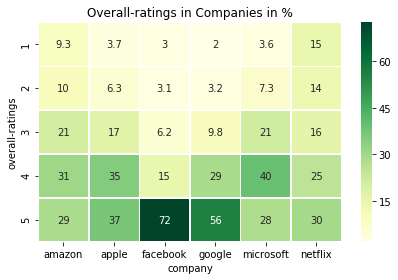

In [15]:
plot_heatmap('overall-ratings','company', 'Overall-ratings in Companies in %' )

Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are:

72% people in FB have rated it 5 and overall 87% people are very happy working in FB. This is followed by Gogle with 85%
NetFlix has got a 55-45% which means people have neutral say about the company.

60% people are happy with Amazon
72% people are happy with Apple
68% people are happy with Microsoft

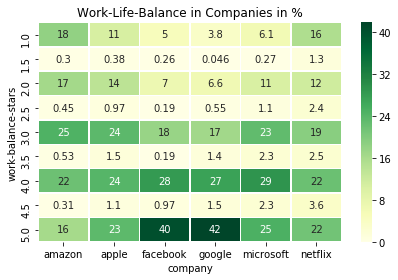

In [16]:
plot_heatmap('work-balance-stars','company', 'Work-Life-Balance in Companies in %' )

Assuming 4 and above to be very good rating, and less than 4 to be not so good, some observations from the above plot are for Work/Life Balance
46.2% people in amazon have a W/L balance
54% apple
70.5% FB
76.3% Google
60.6% Microsoft
50.5% Netflix

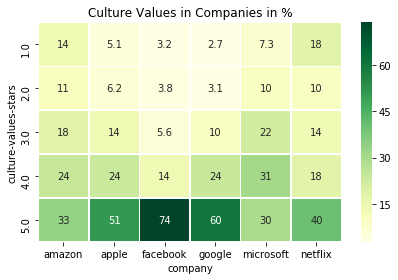

In [17]:
plot_heatmap('culture-values-stars','company', 'Culture Values in Companies in %' )

In cultural values,
Facebook leads with 89%
Amazon 48%
Apple 60%
GOogle 62%
Microsoft 45%
Netflix 36%

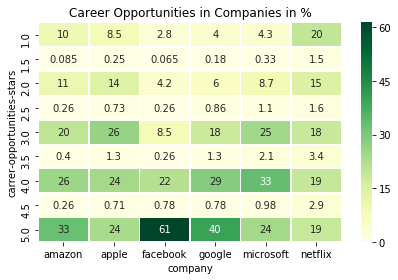

In [18]:
plot_heatmap('carrer-opportunities-stars','company', 'Career Opportunities in Companies in %' )

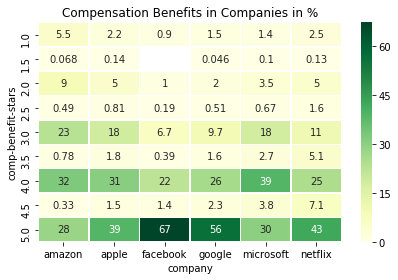

In [19]:
plot_heatmap('comp-benefit-stars','company', 'Compensation Benefits in Companies in %' )


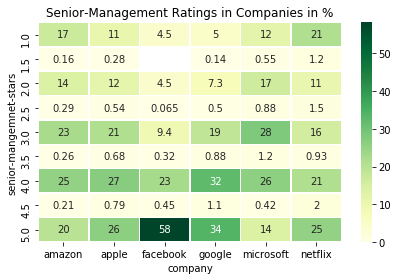

In [20]:
plot_heatmap('senior-mangemnet-stars','company', 'Senior-Management Ratings in Companies in %' )